## DERIVATIVE PRICING
MODULE 3 | LESSON 1


---



# **THE TRINOMIAL MODEL**


|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Binomial model, Option pricing, No-arbitrage |
|**Keywords** | Trinomial model, Matching volatility |


---

*Now that we are comfortable with the dynamics of the binomial model, we are going to extend this pricing framework to a more complex level by considering a **trinomial model**.*
*In this lesson, we are going to introduce the trinomial model in Python and learn how to develop it adapting the same features from the binomial case. Even though everything is pretty similar, please make sure you understand the code fully, as this will be important later on.*

## 1. Trinomial Tree: Underlying Evolution (Toy-Example)


Intuition: How do we get the underlying evolution in a trinomial recombining tree?

Note that the tree is **recombining**, which means $d=\frac{1}{u}$. This is an assumption that is not purely necessary but simplifies our pricing task, as we will see when we discuss the completeness of the model.

As always, let's start importing the necessary libraries:

In [1]:
import numpy as np

Consider a trinomial tree similar to the one from the slides with just one period ($T=1$) and one step in the pricing process ($N=1$). Also, with the following parameters: $u=1.2$, $d=1/u$, $m=1$ and $S_0=100$.<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

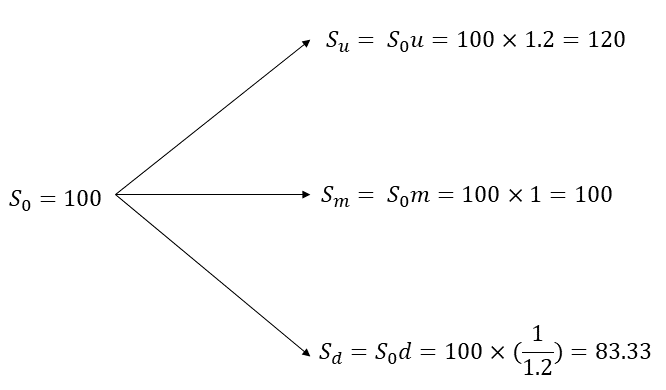

The following code snippet computes the underlying values at the end of the "nb-period," in this case, as we are dealing with a 1-period tree, at the end of the first period:

In [2]:
nb = 3  # number of periods (T=1)
up = 1.2  # up movement
down = 1 / up  # down movement to force a "recombining tree"
s0 = 100

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # putting together the last period tree underlyings ("nb-period")
res *= s0  # multiplying all by S0
print(res)

[ 57.87037037  69.44444444  83.33333333 100.         120.
 144.         172.8       ]


In the case of having a two-step model, this would be:

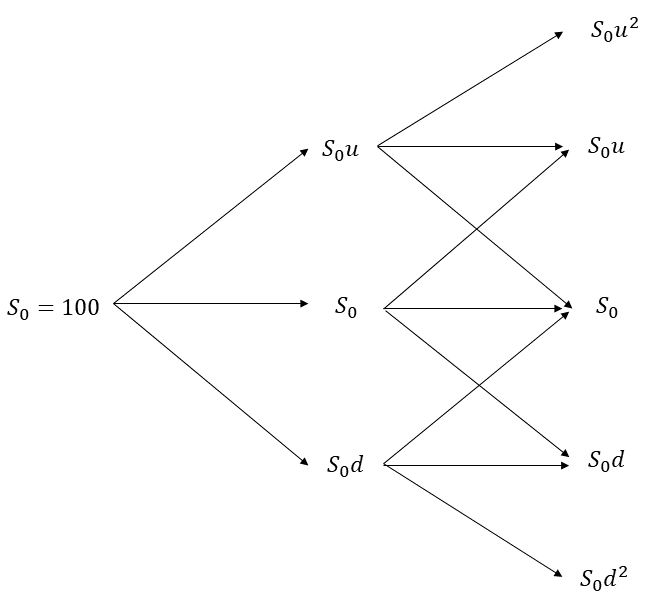

In [3]:
nb = 2  # number of periods (T=2)
up = 1.2  # up movement
down = 1 / up  # down movement to force a "recombining tree"
s0 = 100

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # putting together the last period tree underlyings ("nb-period")
res *= s0
print(res)

[ 69.44444444  83.33333333 100.         120.         144.        ]


At this point, the only thing we have printed is the terminal values of the underlying stock price.

Finally, if we want to get the evolution of the underlying stock for each step in the tree, we can use the following functions together:
 
**(*Note: It is important to understand these functions in order to succeed in the next lesson*).**

In [4]:
def _gen_stock_vec(nb, up):
    s0 = 100
    down = 1 / up
    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [5]:
nb = (
    5  # In this example, np means "periods" because we are not matching volatility yet.
)

for i in range(1, nb + 1):
    vec_stock = _gen_stock_vec(nb - i, 1.2)
    print(vec_stock)

[ 48.22530864  57.87037037  69.44444444  83.33333333 100.
 120.         144.         172.8        207.36      ]
[ 57.87037037  69.44444444  83.33333333 100.         120.
 144.         172.8       ]
[ 69.44444444  83.33333333 100.         120.         144.        ]
[ 83.33333333 100.         120.        ]
[100.]


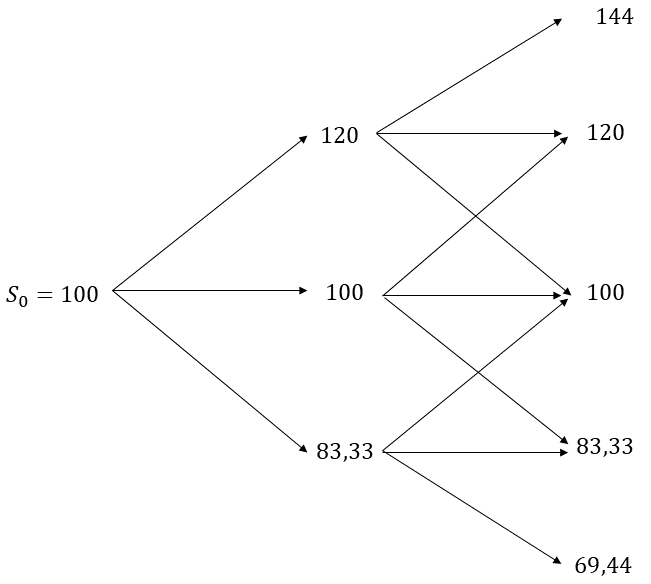

## 2. Matching Volatility in the Trinomial Tree

In the next step, we are going to revisit an old idea from the previous modules: **matching underlying volatility to the parameters in the tree**.

At this point, you already know about the intuition behind this idea. The situation is a little bit more complex in the trinomial tree than for the binomial case:

In [6]:
s0 = 100
sigma = 0.3
T = 1
nb = 10
h = (
    T / nb
)  # We now consider the number of time-step in each period (this would be our 'dt' )
up = np.exp(sigma * np.sqrt(2 * h))  # We match the volatility
down = 1 / up  # Down movement to force a "recombining tree"

vec_u = up * np.ones(nb)
np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

vec_d = down * np.ones(nb)
np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

res = np.concatenate(
    (vec_d[::-1], [1.0], vec_u)
)  # Putting together the last period tree underlying evolution
res *= s0
print(res)

[ 26.1416388   29.89506684  34.18741373  39.09605769  44.7094869
  51.12889477  58.47000405  66.86515303  76.46568122  87.44465748
 100.         114.35804414 130.77762259 149.55473137 171.02786571
 195.58412216 223.66617674 255.78026512 292.50530849 334.50334979
 382.5314884 ]


In order to easily use this later on, let's put all this into a function, `_gen_stock_vec()`:

In [7]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.3
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

And check how it performs with an example:

In [ ]:
nb = 3  # 3-steps in 1 "year" (assuming parameters are all annualized)
h = 1 / nb
for i in range(1, nb + 1):
    vec_stock = _gen_stock_vec(nb - i, h)
    print(vec_stock)

## 3. Conclusion

You now have the basic understanding of how a trinomial tree works. Now, try and use the previously coded function to price options with longer time-steps (or periods)... are you able to? Try to think of a few examples and implement them.

In the next lesson, we will go over pricing on the trinomial tree and the martingale concept to obtain risk-neutral probabilities in the trinomial setting.

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
